In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
import NewFunctions
import numpy as np
import pandas as pd

from scipy import optimize

In [42]:
import matplotlib.pyplot as plt

In [43]:
def chisquare(y, yhat, err):
    return np.sum(((y - yhat)/err)**2)

In [44]:
def dataslicercombined(df, hadrons, dependencies):
    '''
    returns X, y, err
    '''
    df = df.loc[df['hadron'].isin(hadrons), :]
    df = df.loc[df['1D_dependence'].isin(dependencies), :]
    X = np.array(df[['x', 'z', 'phT', 'Q2', 'hadron']])
    for i, had in enumerate(['pi+', 'pi-', 'pi0', 'k+', 'k-']):
        X[X[:, 4] == had, 4] = i
    X = X.astype('float')
    return X, np.array(df['Siv']), np.array(df['tot_err'])

In [45]:
herm9 = pd.read_csv('HERMES_p_2009.csv').dropna(axis=0, how='all').dropna(axis=1, how='all')
herm20 = pd.read_csv('HERMES_p_2020.csv').dropna(axis=0, how='all').dropna(axis=1, how='all')
comp9 = pd.read_csv('COMPASS_d_2009.csv').dropna(axis=0, how='all').dropna(axis=1, how='all')
comp15 = pd.read_csv('COMPASS_p_2015.csv').dropna(axis=0, how='all').dropna(axis=1, how='all')

In [46]:
anselmino_pars = [.18, -0.52, 0, -.01, -.06, 0, 1, 1.9, 0, 6.6, 10, 0, np.sqrt(.8)]

# Test

In [55]:
had = NewFunctions.Hadron()

In [56]:
df = pd.concat([herm9, comp9, comp15])

In [18]:
MyR=[0.9985,0.0905,0.7837,4.3388,0.0606,-0.3010,1.4248,6.3195,-0.1962,-0.4313,0,0,-0.4870]

In [57]:
ishara_pars = [0.0905, -0.3010, -0.4313, .0606, -.1962, -.4870, .7837, 1.4248, 0, 4.3388, 6.3195, 0, .9985]

In [58]:
X, y, err = dataslicercombined(df, ['pi+', 'pi-', 'pi0', 'k+', 'k-'], ['x', 'z', 'phT'])

In [59]:
pars, cov = optimize.curve_fit(had.sivers, X, y,
                               sigma=err, p0=anselmino_pars, method='lm')

In [60]:
pars

array([ 0.09046591, -0.30105535, -0.43130818,  0.06062046, -0.19621093,
       -0.48700617,  0.78378409,  1.42486256,  0.        ,  4.33888247,
        6.31958341,  0.        ,  0.96852916])

In [61]:
yhat = had.sivers(X, *pars)

In [62]:
chisquare(y, yhat, err)/len(X)

5.465642806231776

In [27]:
list(had.sivers(X, *([1]*13)))

[0.1403090911083922,
 0.1266911094832964,
 0.12814184414431323,
 0.13923587274977864,
 0.16057934795945958,
 0.19674397301945143,
 0.25586289086351593]

In [33]:
had.A0(np.array([1., 1.]), np.array([2., 2.]), 1)

array([23.175973, 23.175973])

# Plots

In [16]:
def uncertainty(pars, cov, X, func):
    res = []
    for i in range(1000):
        temp_pars = np.random.multivariate_normal(pars, cov)
        temp_pars = list(map(float, np.round(temp_pars, 5)))
        d = func(X, *temp_pars).real
        res.append(list(d))
    return np.array(res)

In [10]:
had = NewFunctions.Hadron()

In [11]:
X, y, err = dataslicercombined(herm9, ['pi+', 'pi-', 'pi0', 'k+', 'k-'], ['x', 'z', 'phT'])

In [12]:
pars, cov = optimize.curve_fit(had.sivers, X, y,
                               sigma=err, p0=anselmino_pars, method='lm')

/home/nick/Documents/Sivers/NewFunctions.py:55: RuntimeWarning: invalid value encountered in double_scalars
  return n * x**a * (1 - x)**b * (((a + b)**(a + b))/(a**a * b**b))


In [38]:
X, y, err = dataslicercombined(herm9, ['pi+'], ['x'])

In [39]:
chisquare(y, had.sivers(X, *pars), err)/len(X)

2.535770624094635

In [34]:
def plotBands(df, hadron, dependence, pars, cov, title, numSigma=2):
    X, y, err = dataslicercombined(df, [hadron], [dependence])
    had = NewFunctions.Hadron()
    results = uncertainty(pars, cov, X, had.sivers)
    
    
    yhat = results.mean(axis=0)
    yerr = results.std(axis=0)
    print(yhat, '\n', X[:, 0])
    plt.fill_between(X[:, 0], yhat-numSigma*yerr, yhat+numSigma*yerr,
                     facecolor='r', alpha=0.3, label='yhat')
    #print(X[dependence], '\n', y)
    plt.errorbar(X[:, 0], y, yerr=numSigma*err,
             fmt='bo', label='y')
    
    plt.legend()
    plt.title(title)
    plt.xlabel(dependence)
    plt.ylabel('Sivers')
    plt.savefig(title + '.pdf', format='pdf')

/home/nick/Documents/Sivers/NewFunctions.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  res[idxs] = a0*(numerator/denominator)


[0.10733386 0.05502481 0.04237331 0.03891558 0.03789459 0.03816714
 0.03503511] 
 [0.036 0.056 0.076 0.098 0.133 0.186 0.275]


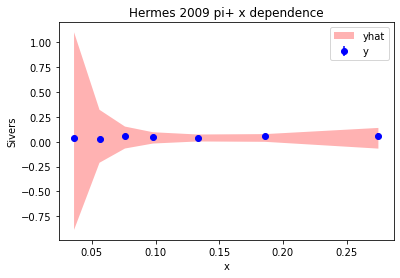

In [35]:
plotBands(herm9, 'pi+', 'x', pars, cov, 'Hermes 2009 pi+ x dependence')

# Combined all except 2020

In [25]:
had = NewFunctions.Hadron()

In [27]:
df = pd.concat([herm9, comp9, comp15])

In [28]:
X, y, err = dataslicercombined(df, ['pi+', 'pi-', 'pi0', 'k-', 'k+'], ['x', 'z', 'phT'])

In [29]:
pars, cov = optimize.curve_fit(had.sivers, X, y,
                               sigma=err, p0=anselmino_pars, method='lm')

/home/nick/Documents/Sivers/NewFunctions.py:55: RuntimeWarning: invalid value encountered in double_scalars
  return n * x**a * (1 - x)**b * (((a + b)**(a + b))/(a**a * b**b))


In [30]:
np.diag(cov)

array([9.12138922e-05, 1.62451663e-02, 4.83933197e-02, 1.87498733e-04,
       8.59406366e-03, 7.25263326e-02, 4.07302884e+00, 2.05452255e+00,
       6.88976661e-02, 1.35364365e+02, 1.05681729e+02, 3.02432106e+02,
       2.65515649e-02])

In [31]:
pars

array([ 1.82870170e-02, -1.68806374e-01,  5.84699410e-02, -5.30406488e-03,
        1.59579057e-02, -1.36392044e-01,  9.58182771e-01,  1.77560819e+00,
        2.63656457e-08,  4.88859964e+00,  5.91690350e+00,  3.02144329e+00,
        9.24782351e-01])

In [32]:
yhat = had.sivers(X, *pars)

## $\chi^2/dof$

In [19]:
chisquare(y, yhat, err)/len(X)

5.125658387264672

## Plot

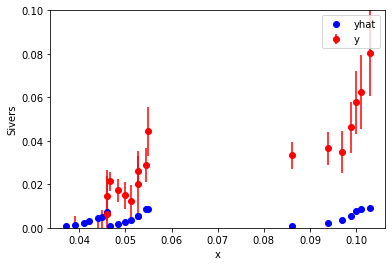

In [24]:
Xplt, yplt, errplt = dataslicercombined(df, ['pi+'], ['z'])

yhatplt = had.sivers(Xplt, *pars)

plt.plot(Xplt[:, 0], yhatplt, 'bo', label='yhat')
plt.errorbar(Xplt[:, 0], yplt, yerr=errplt, fmt='ro', label='y')
#plt.ylim(0, .1)
plt.legend()
plt.ylabel('Sivers')
plt.xlabel('x')
plt.show()

# Combined all

In [35]:
df = pd.concat([herm9]) #, comp9, comp15, herm20

In [36]:
X, y, err = dataslicercombined(df, ['pi+', 'pi-', 'pi0', 'k-', 'k+'], ['x', 'z', 'phT'])

In [66]:
pars, cov = optimize.curve_fit(had.sivers, X, y,
                               sigma=err, p0=anselmino_pars, method='trf')

In [37]:
pars

array([ 1.82870170e-02, -1.68806374e-01,  5.84699410e-02, -5.30406488e-03,
        1.59579057e-02, -1.36392044e-01,  9.58182771e-01,  1.77560819e+00,
        2.63656457e-08,  4.88859964e+00,  5.91690350e+00,  3.02144329e+00,
        9.24782351e-01])

In [40]:
yhat = had.sivers(X, *ishara_pars)

## $\chi^2/dof$

In [132]:
1700/447

3.8031319910514543

In [131]:
len(X)

447

In [44]:
chisquare(y, yhat, err)/len(X)

4.675243408575259

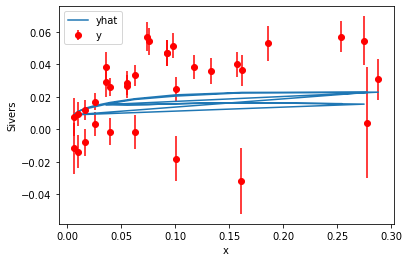

In [74]:
X, y, err = dataslicercombined(df, ['pi+'], ['x'])

yhat = had.sivers(X, *pars)

plt.plot(X[:, 0], yhat, label='yhat')
plt.errorbar(X[:, 0], y, yerr=err, fmt='ro', label='y')
plt.legend()
plt.ylabel('Sivers')
plt.xlabel('x')
plt.show()

## Test

In [8]:
had = NewFunctions.Hadron()

In [97]:
df = pd.concat([herm9])

In [98]:
X, y, err = dataslicercombined(df, ['pi+', 'pi-', 'pi0', 'k+', 'k-'], ['x', 'z', 'phT'])

In [86]:
anselmino_pars = [.18, -0.52, 0, -.01, -.06, 0, 1, 1.9, 0, 6.6, 10, 0, np.sqrt(.8)]

In [39]:
ishara_pars = [0.0905, -0.3010, -0.4313, .0606, -.1962, -.4870, .7837, 1.4248, 0, 4.3388, 6.3195, 0, .9985]

In [99]:
yhat = had.sivers(X, *ishara_pars)

In [89]:
y.sum()

1.6462

In [58]:
len(X)

104

In [59]:
chisquare(y, yhat, err)/len(X)

6.943244015640415

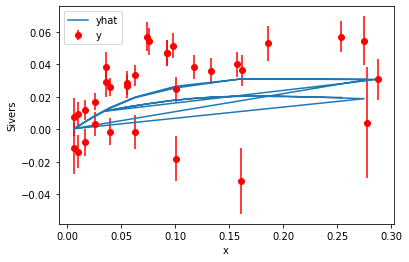

In [140]:
X, y, err = dataslicercombined(df, ['pi+'], ['x'])

yhat = had.sivers(X, *ishara_pars)

plt.plot(X[:, 0], yhat, label='yhat')
plt.errorbar(X[:, 0], y, yerr=err, fmt='ro', label='y')
plt.legend()
plt.ylabel('Sivers')
plt.xlabel('x')
plt.show()